In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy
from scipy.ndimage import gaussian_filter1d

In [4]:
%matplotlib notebook

In [5]:
def make_data():
    N = 10000
    x = np.linspace(0, 4, N)
    x[2000:] += 1
    x[5500:] -= 2
    x[8000:] += 0.5
    x = gaussian_filter1d(x, 100)
    return x + cauchy.rvs(0, 0.3, N)

In [6]:
x = make_data()

# Running median of a time series

Let $z$ be a time series of real numbers formed by a slowly changing signal $x$ corrupted by additive, independent, and identically distributed noise $\epsilon$, $z(n) = x(n) + \epsilon(n)$. The noise has many outliers, and its mean is undefined, but its median is known to be zero. You also know that $x(n)$ changes slowly; $|x(n) - x(n-1)|$ is usually less than 0.01.

You task is to recover the signal $z$ given $x$ by computing a running estimate $m(n)$ of the **median** of $x(n)$, $m(n) \approx \mathrm{Median}(x(n))$. The estimate must be computed online -- that is, $m(n)$ can only depend on $x$ up to and including index $n$. You estimator may only use a constant (and small) amount of memory; no matter how long $x$ is, the estimator has to use the same amount of memory.

<IPython.core.display.Javascript object>


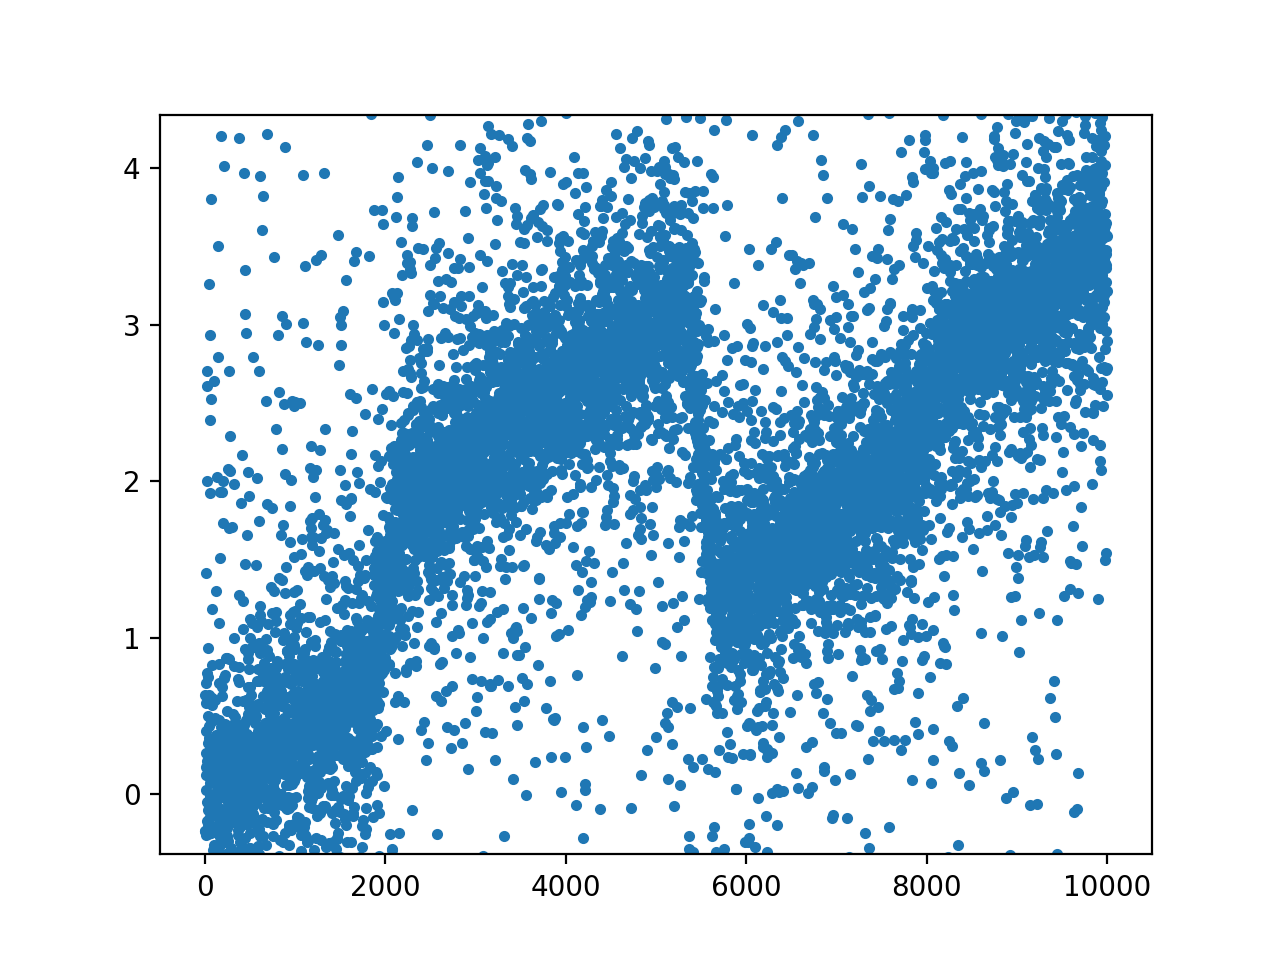

(-0.3843239725000119, 4.337885917292166)

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, ".")
ax.set_ylim(np.percentile(x, [5, 95]))

**Answer**

Here is one way to do it. It's the same as a moving average, except that the output moves by steps that are the same size no matter how big or small the values of the input are.

In [14]:
d = 1e-2
m = np.zeros(N := len(x))
for i in range(1, N):
    if m[i-1] < x[i]:
        m[i] = m[i-1] + d
    else:
        m[i] = m[i-1] - d

<IPython.core.display.Javascript object>


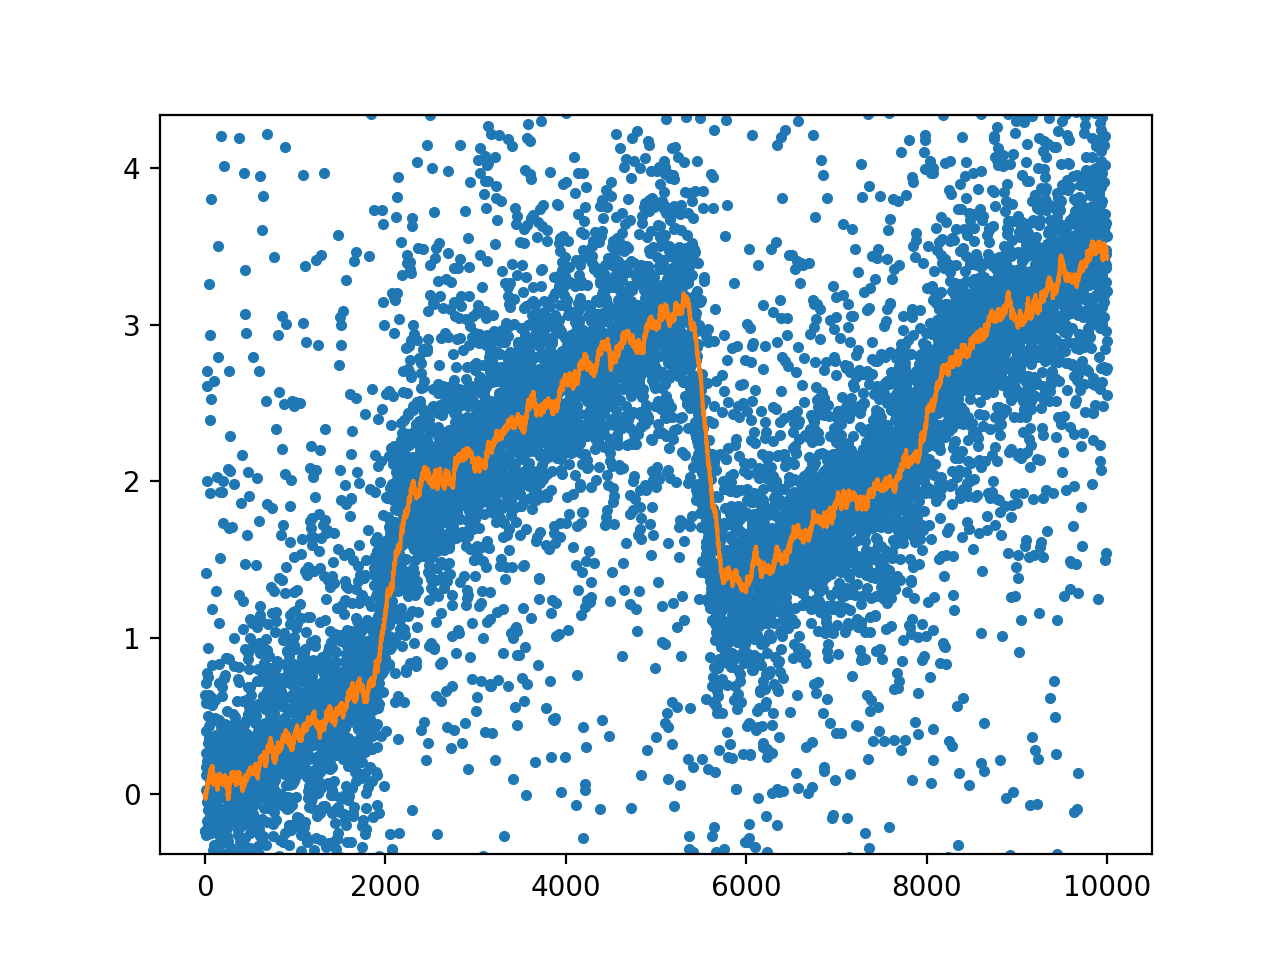

(-0.3843239725000119, 4.337885917292166)

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, ".")
ax.plot(m)
ax.set_ylim(np.percentile(x, [5, 95]))

Why does your method work? How does it trade off between precision and fast response?

**Answer:** It works because if $m(n-1)$ equals the median of $x(n)$, then it is equally likely to decrease as to increase. In general, if $q(n)$ is the quantile of $m(n-1)$ in the distribution of $x(n)$, the expected value of $m(n) - m(n-1)$ over $x(n)$ is proportional to $0.5 - q(n)$.

Less formally, it works because the fixed step size means every value has the same influence on the output; otliers have none of the extra influence that they do over an average.

How might you adapt your method to approximate arbitrary percentiles of $x$?

**Answer**

In [16]:
u = 1e-2
d = 1e-1
m = np.zeros(N := len(x))
for i in range(1, N):
    if m[i-1] < x[i]:
        m[i] = m[i-1] + u
    else:
        m[i] = m[i-1] - d

<IPython.core.display.Javascript object>


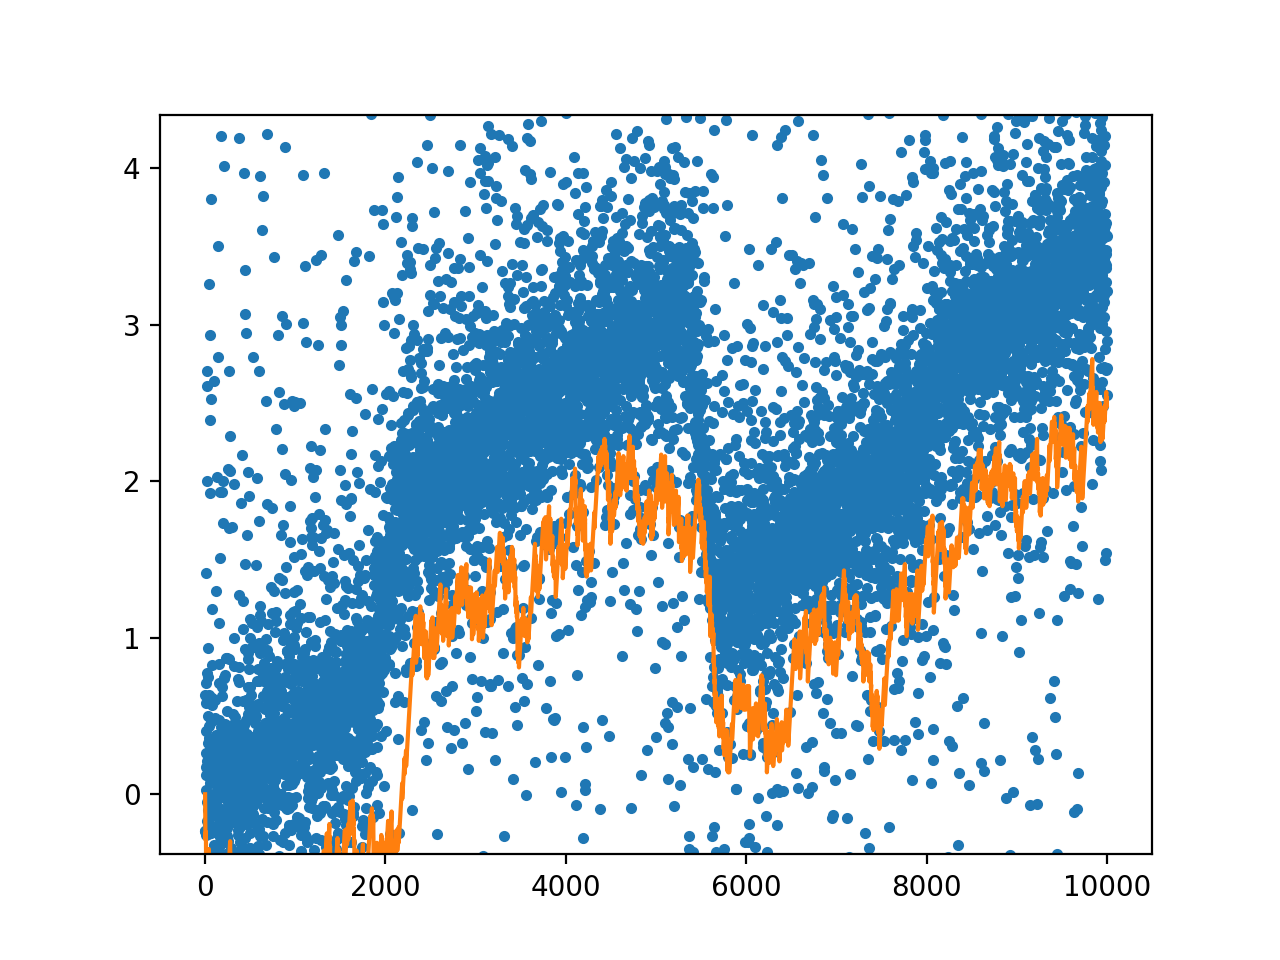

(-0.3843239725000119, 4.337885917292166)

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, ".")
ax.plot(m)
ax.set_ylim(np.percentile(x, [5, 95]))